# Setup

In [1]:
import numpy as np
import math
import random
import scipy.io
from lab8_common import create_map, show_map, cast_rays
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# plt.ion()

/Users/kevinjreece/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Helper Functions

In [71]:
def calcGaussianLikelihood(actual_sensor_data, particle_sensor_data):
    all_diffs = actual_sensor_data - particle_sensor_data
    likelihoods = []
    for diff in all_diffs:
        likelihoods.append(np.exp(-sigma * np.sum(diff * diff)))
    return np.atleast_2d(likelihoods).T

def calcLaplacianLikelihood(actual_sensor_data, particle_sensor_data):
    all_diffs = actual_sensor_data - particle_sensor_data
    likelihoods = []
    for diff in all_diffs:
        likelihoods.append(np.exp(-sigma * np.sum(np.abs(diff))))
    return np.atleast_2d(likelihoods).T

def jitterPoints(particles):
    for particle in particles:
        particle[0] += np.random.randn() * 0.02
        particle[0] = max(particle[0] , 0)
        particle[0] = min(particle[0], 1)
        particle[1] += np.random.randn() * 0.02
        particle[1] = max(particle[1] , 0)
        particle[1] = min(particle[1], 1)
        particle[2] += np.random.randn()
        particle[2] %= (2 * math.pi)
    return particles

def updateWeights(weights, particles, actual_sensor_data, likelihoodEquation):
    particle_sensor_data = cast_rays(particles.T, room_map)
#     print particle_sensor_data.shape
    likelihood = likelihoodEquation(actual_sensor_data, particle_sensor_data)
#     print "likelihood:", likelihood.shape
    new_weights = likelihood
#     print "new_weights:", new_weights.shape
    new_weights /= np.sum(new_weights)
#     print "new_weights again:", new_weights.shape
    return new_weights

def resampleParticles(weights, particles):
    samples = np.random.mtrand.multinomial(particle_count, weights.T[0])
#     print samples
    new_particles = []
    for index, count in enumerate(samples):
        for j in range(count):
            new_particles.append(particles[index])
    return np.array(new_particles)

# Get Data

In [72]:
mat_data = scipy.io.loadmat('data/sensors.mat')
sonars = mat_data['sonars']
true_states = mat_data['true_states']
print sonars.shape
print true_states.shape

(11, 225)
(3, 225)


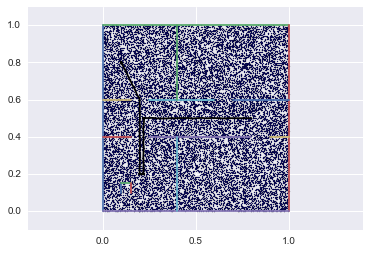

In [73]:
particle_count = 20000
sigma = 9
room_map = create_map()

show_map(room_map)
plt.plot(true_states[0,:], true_states[1,:], color='black')

initial = np.random.rand(particle_count, 3)
initial[:,2] *= 2 * math.pi
plt.scatter(initial[:, 0], initial[:, 1], s=1)
plt.show()

0


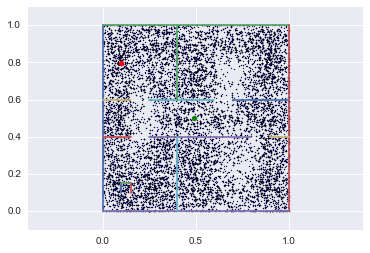

1


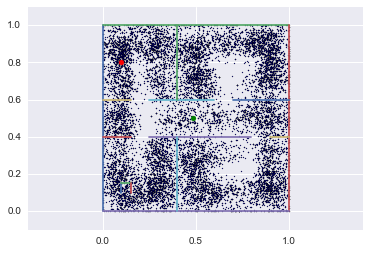

2


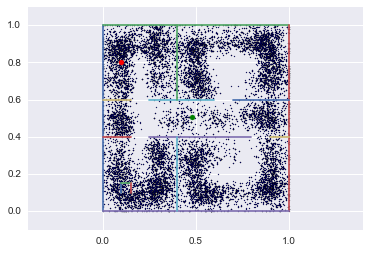

3


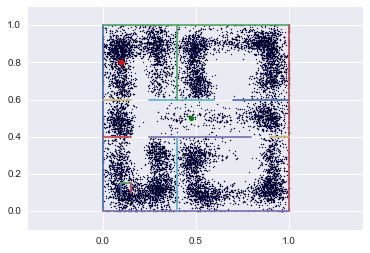

4


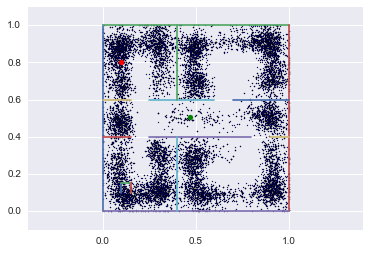

5


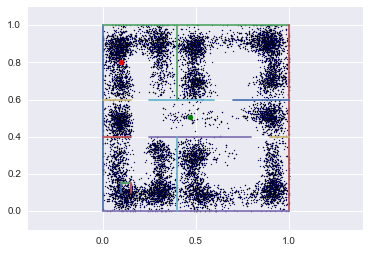

6


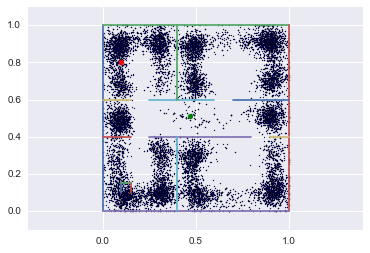

7


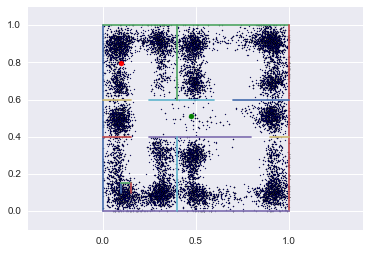

8


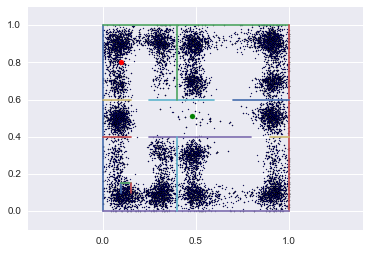

9


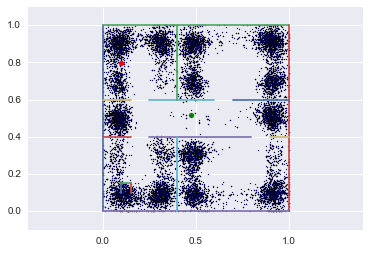

10


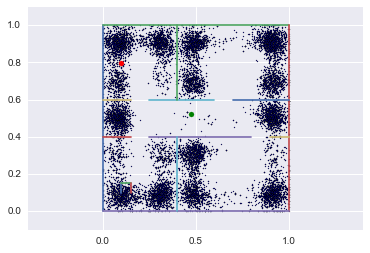

11


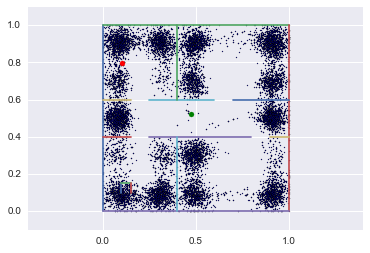

12


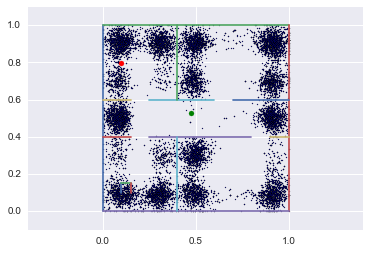

13


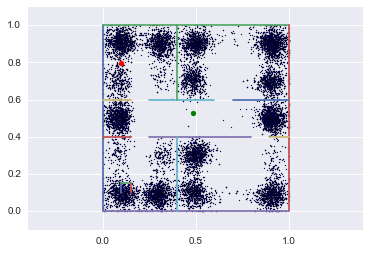

14


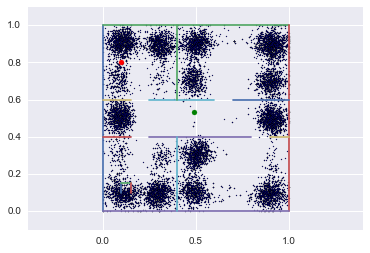

15


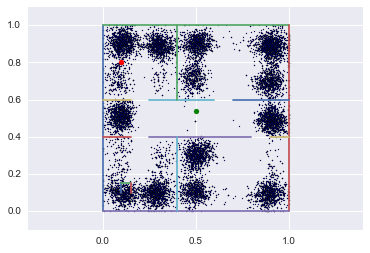

16


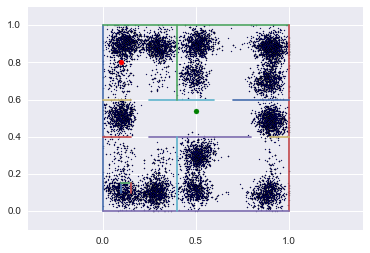

17


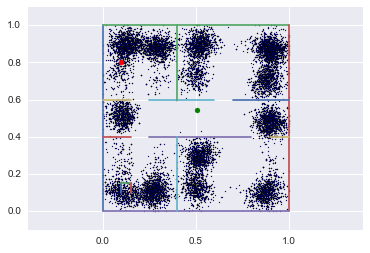

18


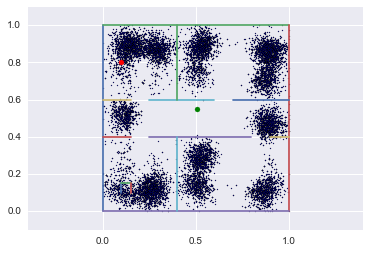

19


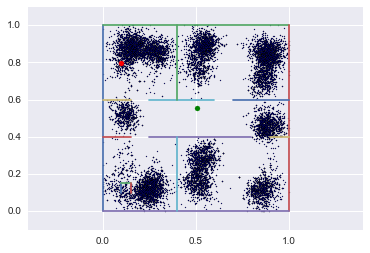

20


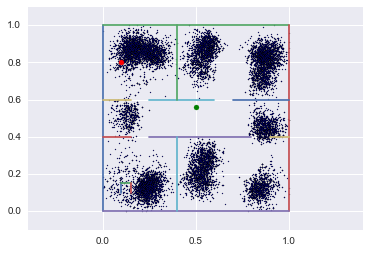

21


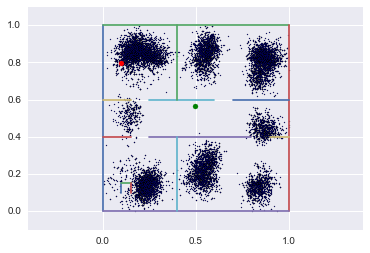

22


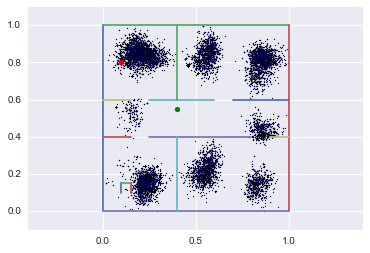

23


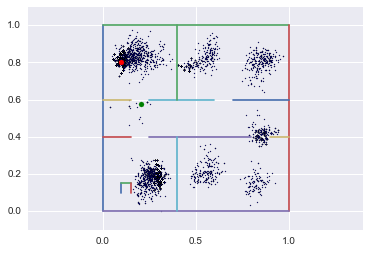

24


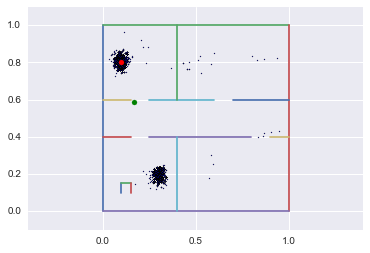

25


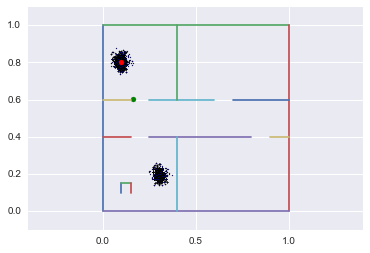

26


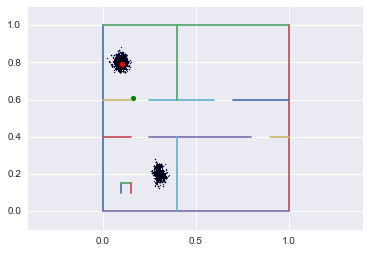

27


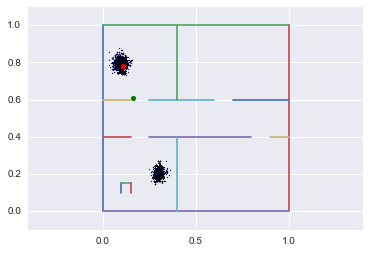

28


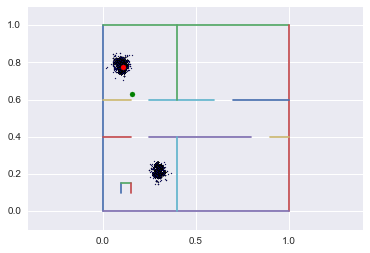

29


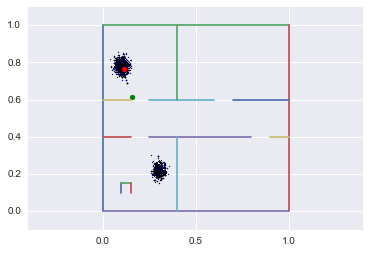

30


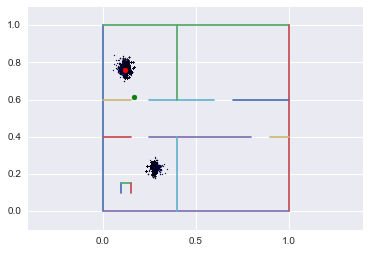

31


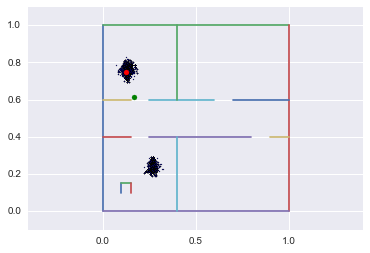

32


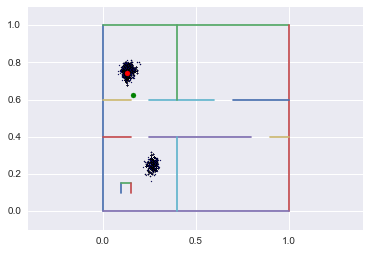

33


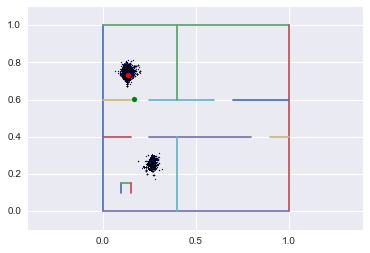

34


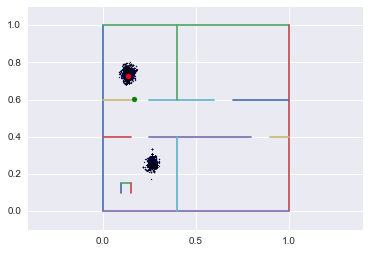

35


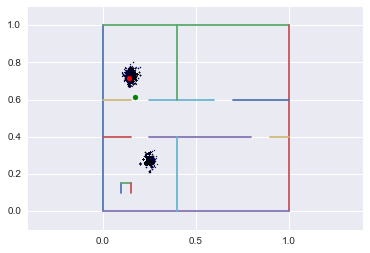

36


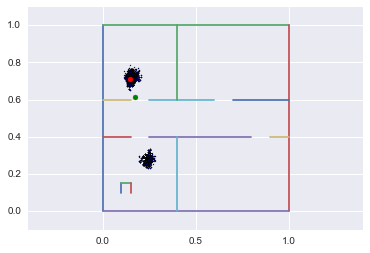

37


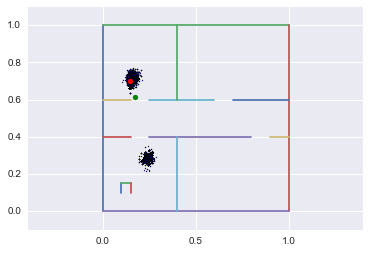

38


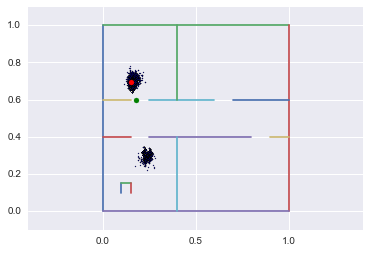

39


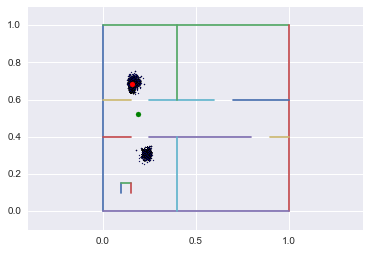

40


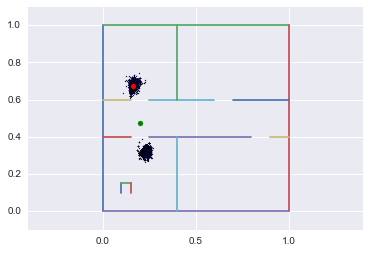

41


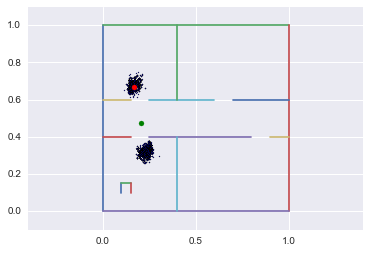

42


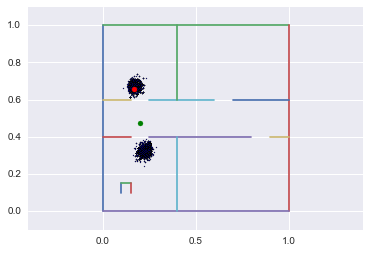

43


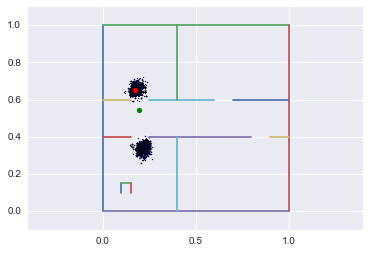

44


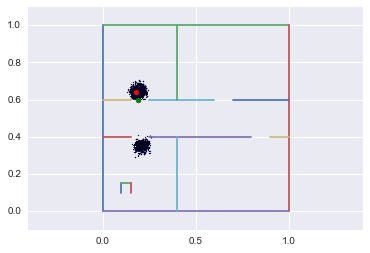

45


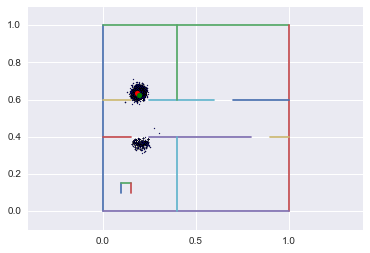

46


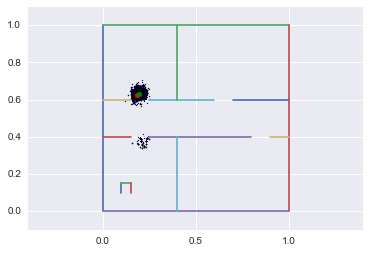

47


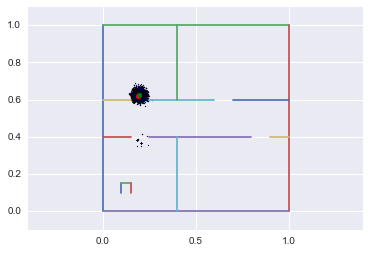

48


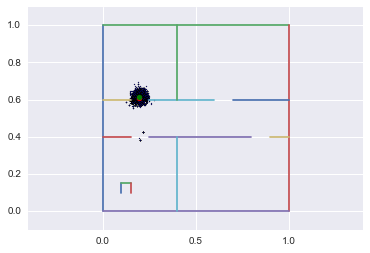

49


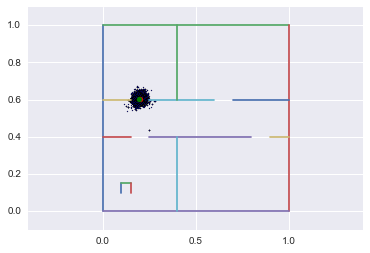

50


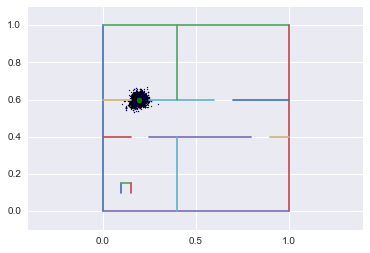

51


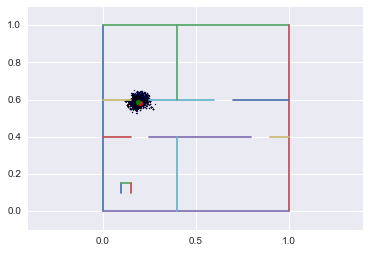

52


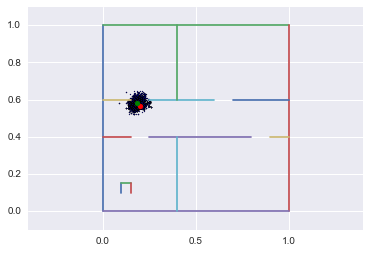

53


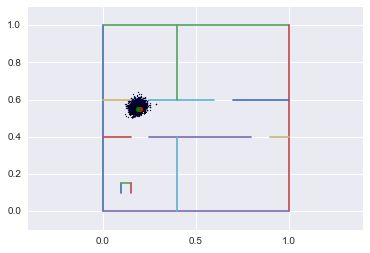

54


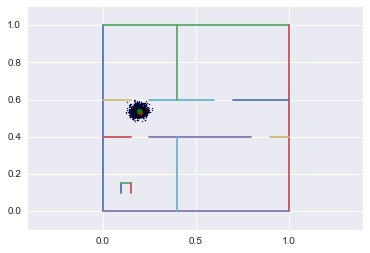

55


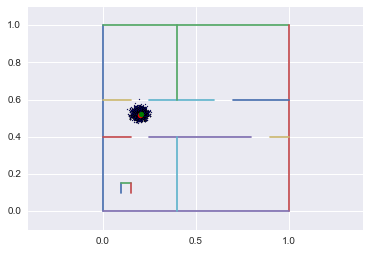

56


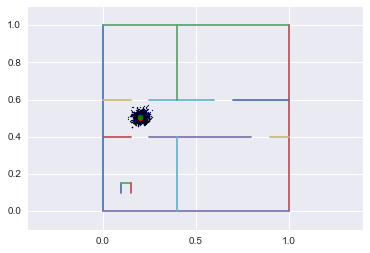

57


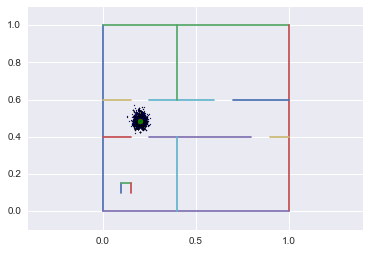

58


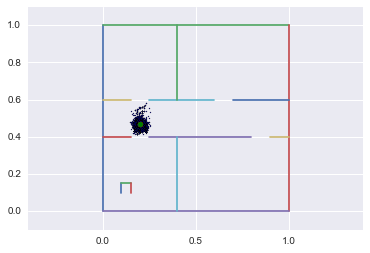

59


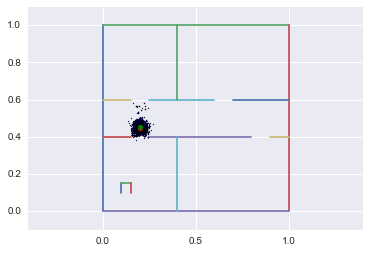

60


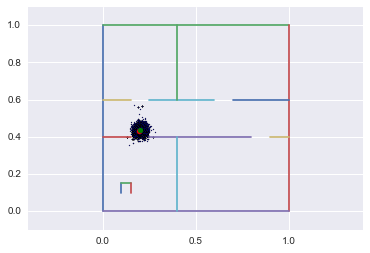

61


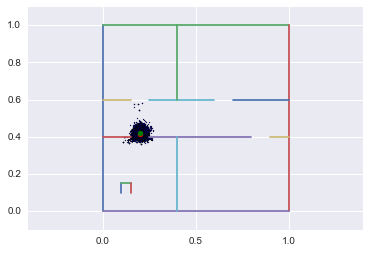

62


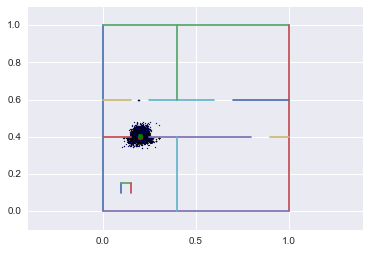

63


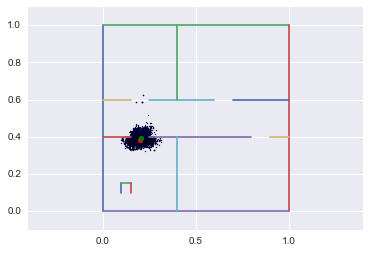

64


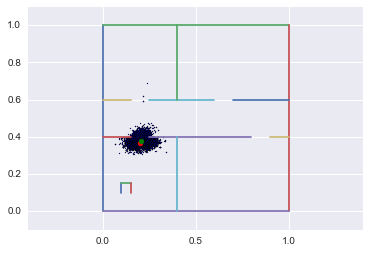

65


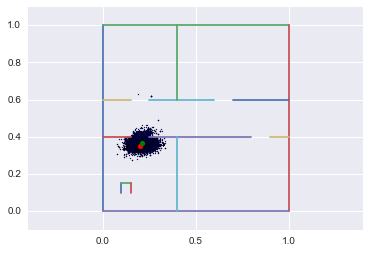

66


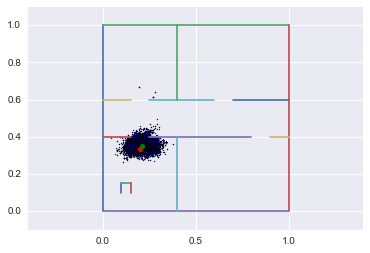

67


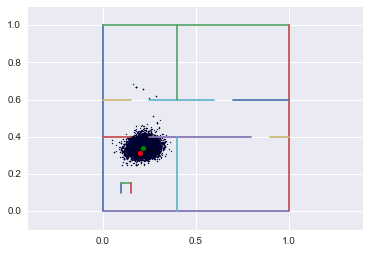

68


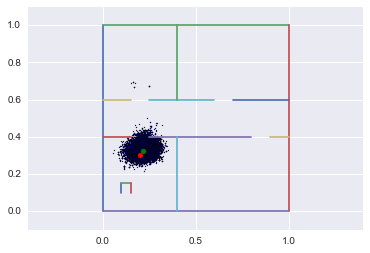

69


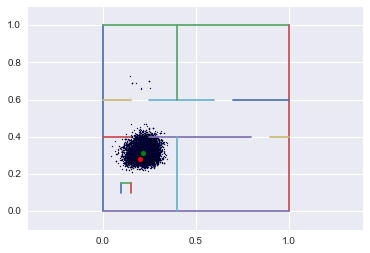

70


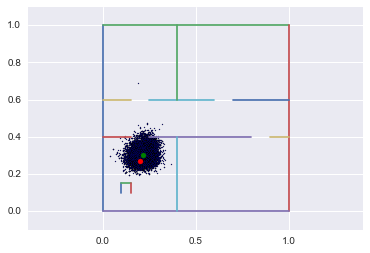

71


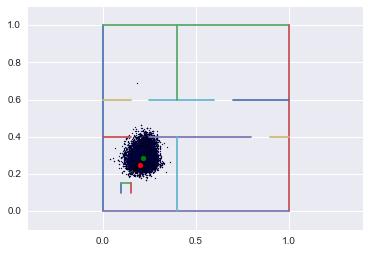

72


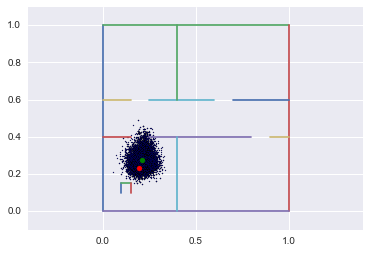

73


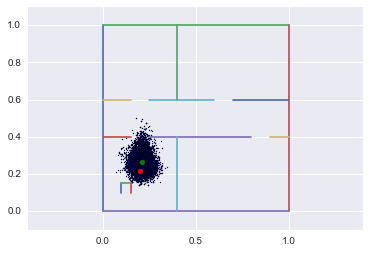

74


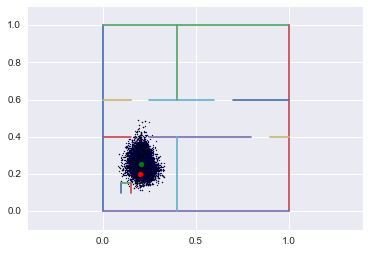

75


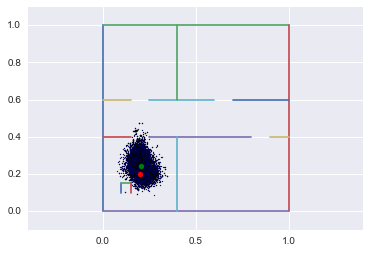

76


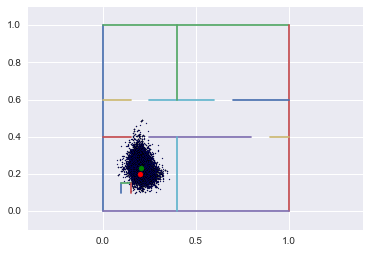

77


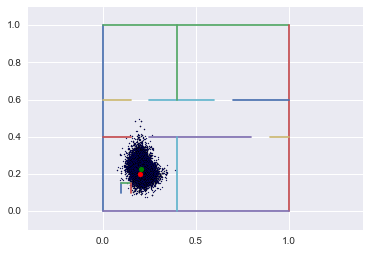

78


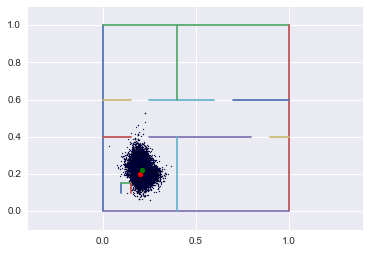

79


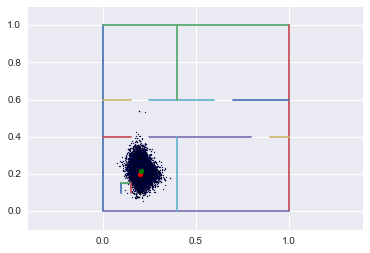

80


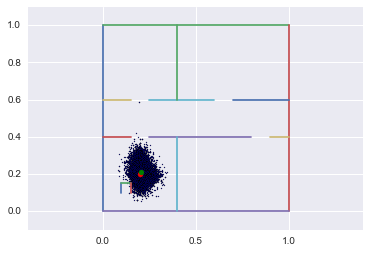

81


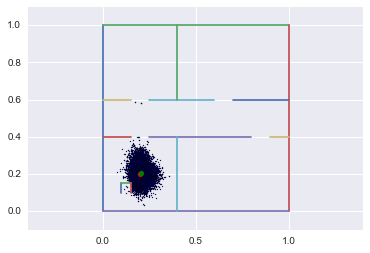

82


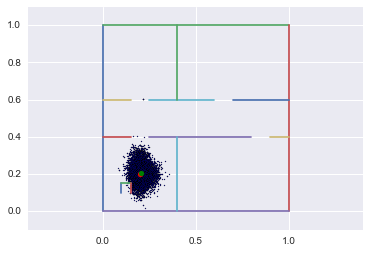

83


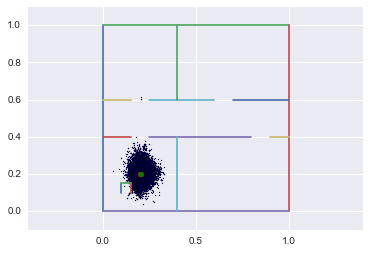

84


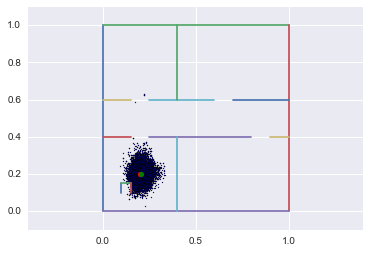

85


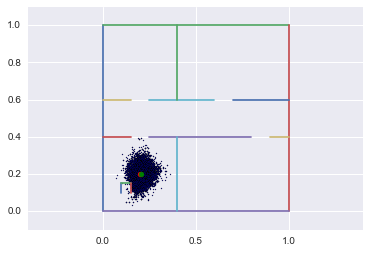

86


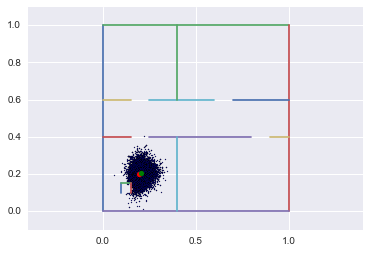

87


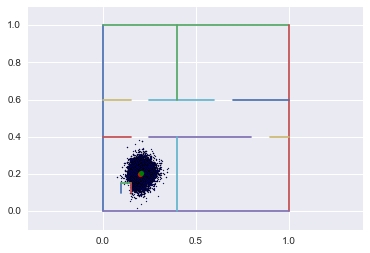

88


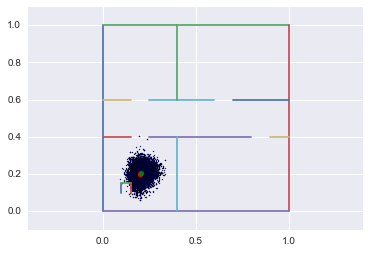

89


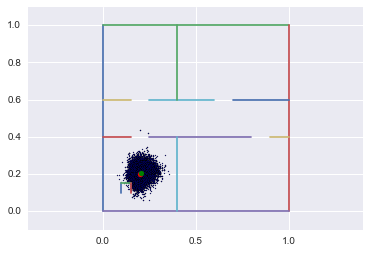

90


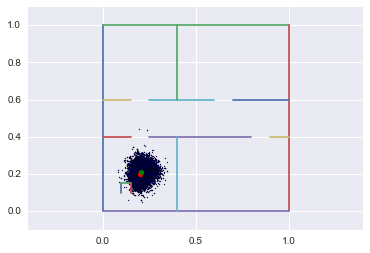

91


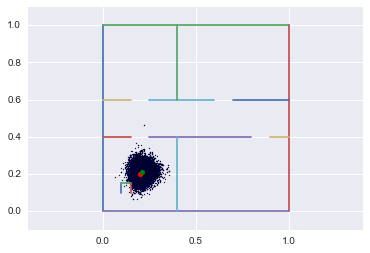

92


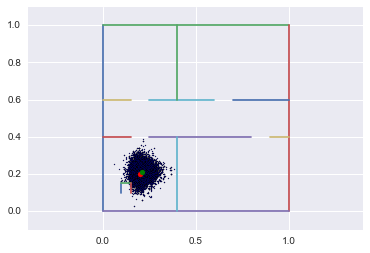

93


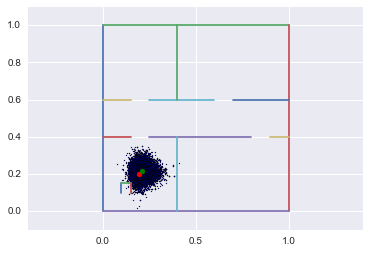

94


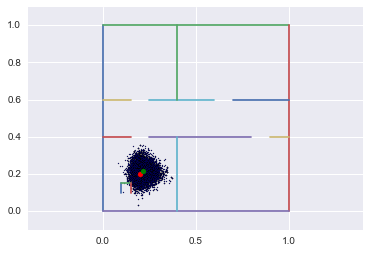

95


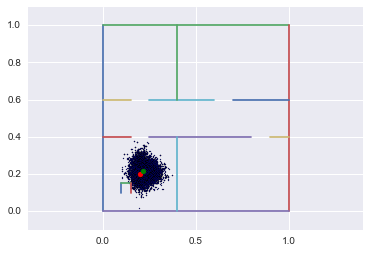

96


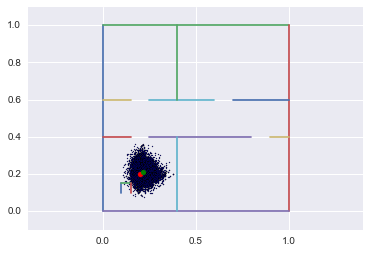

97


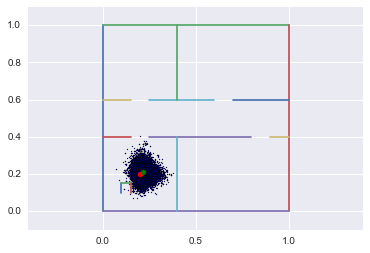

98


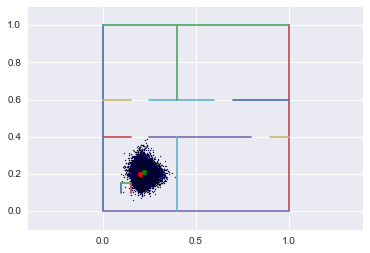

99


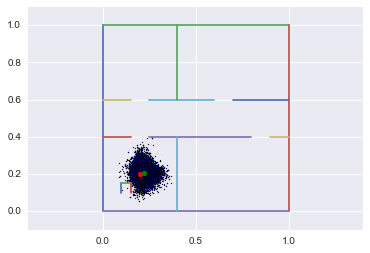

100


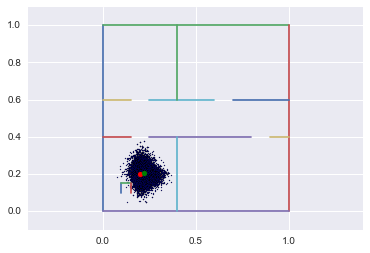

101


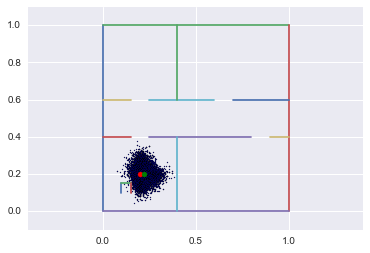

102


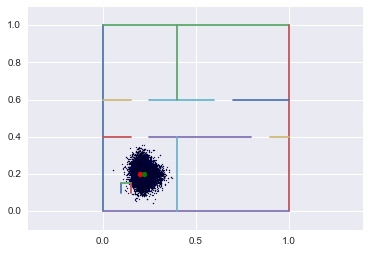

103


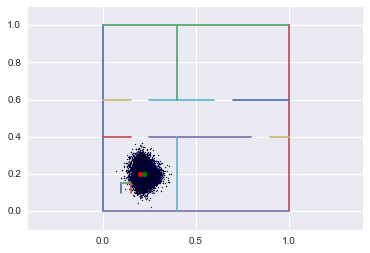

104


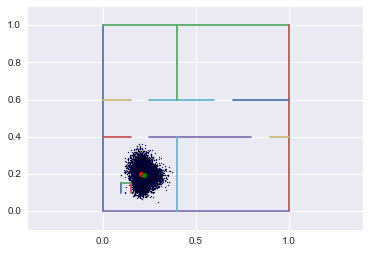

105


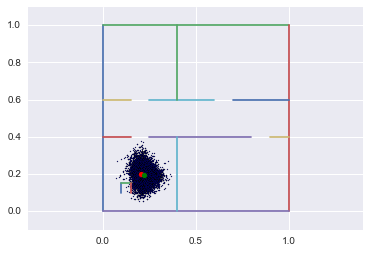

106


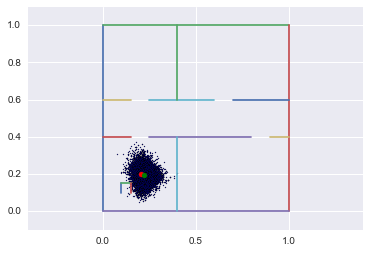

107


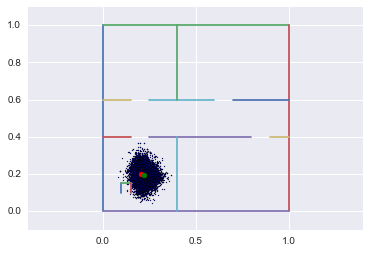

108


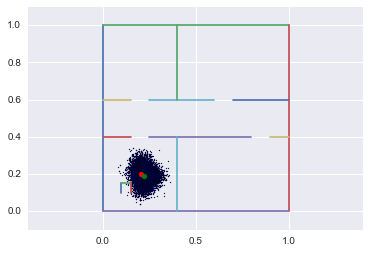

109


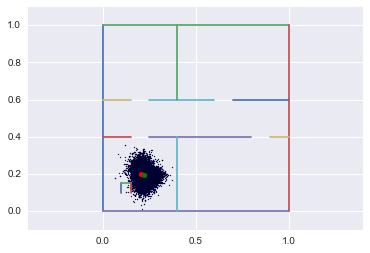

110


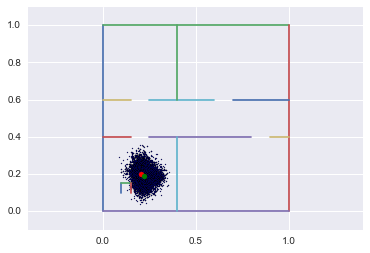

111


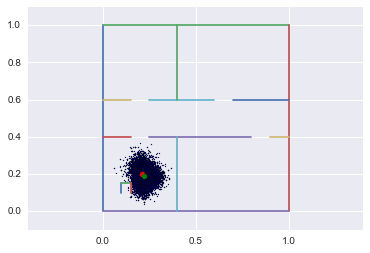

112


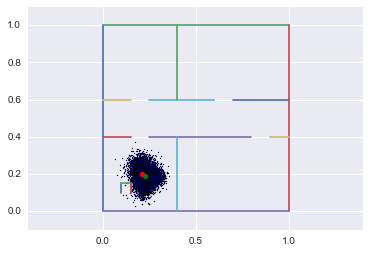

113


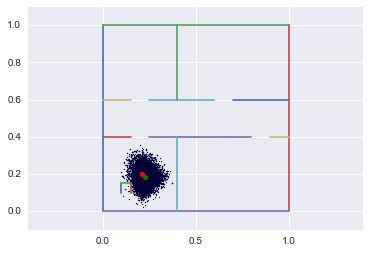

114


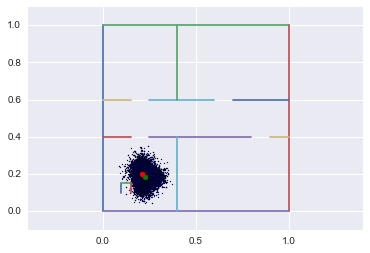

115


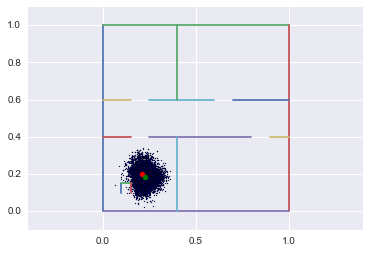

116


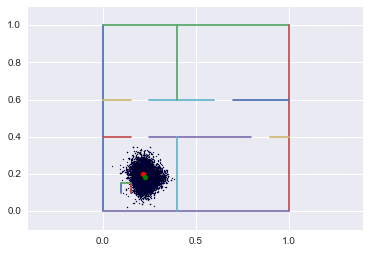

117


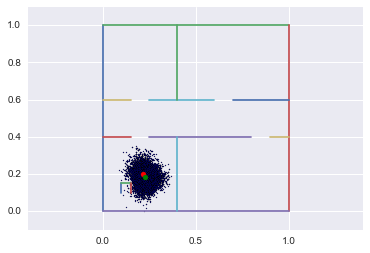

118


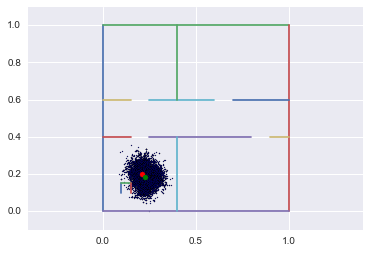

119


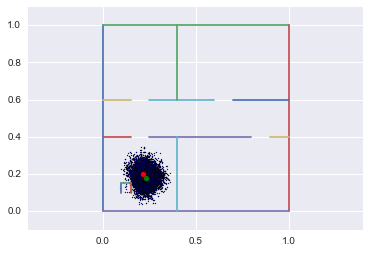

120


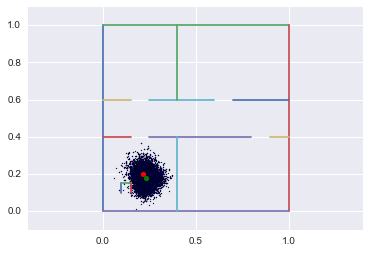

121


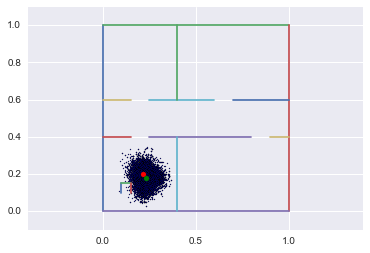

122


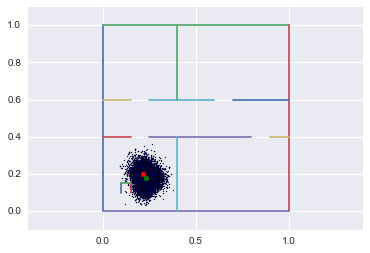

123


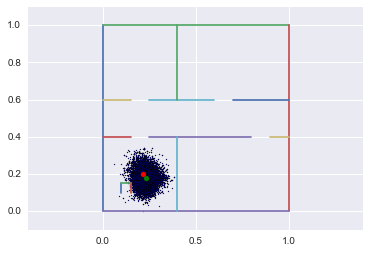

124


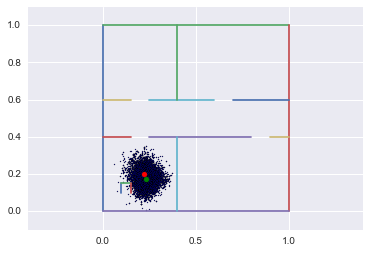

125


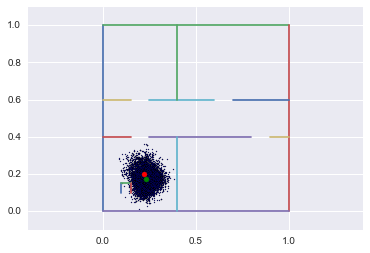

126


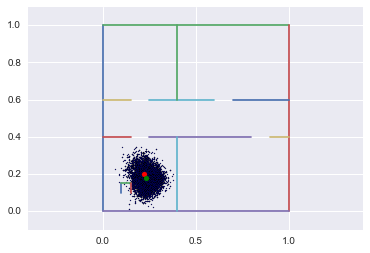

127


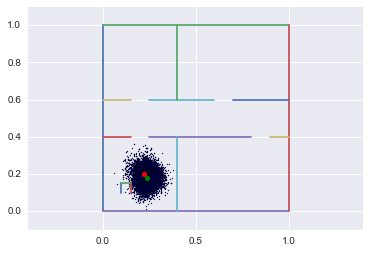

128


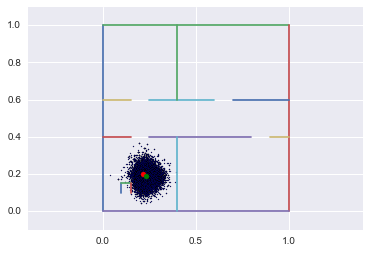

129


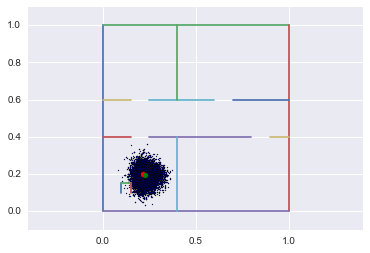

130


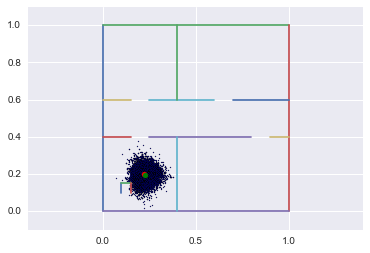

131


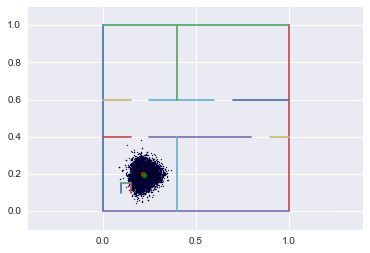

132


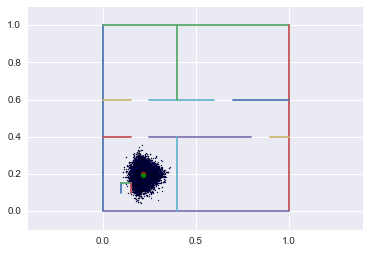

133


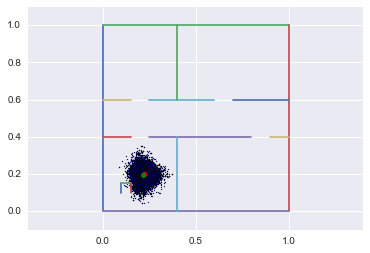

134


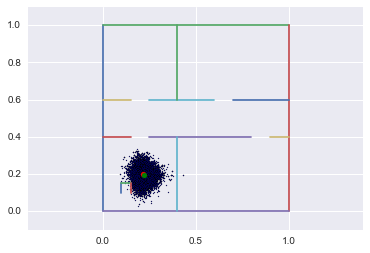

135


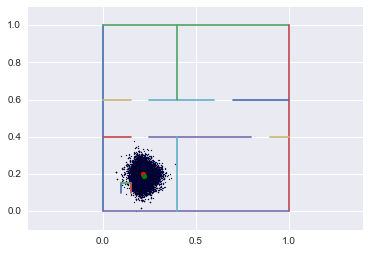

136


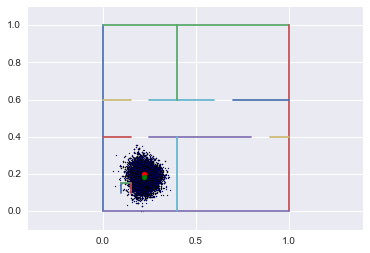

137


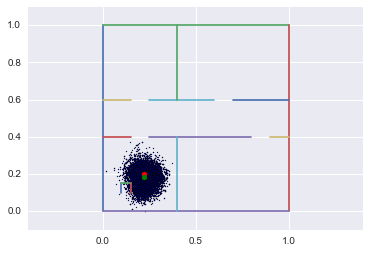

138


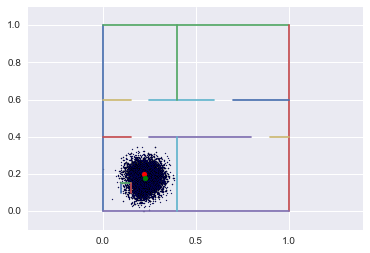

139


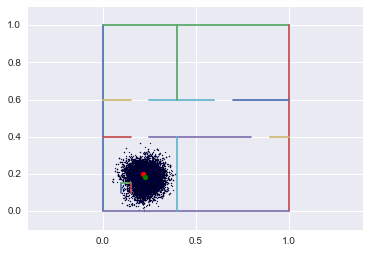

140


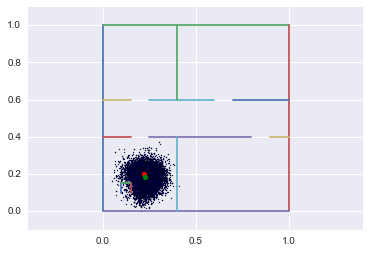

141


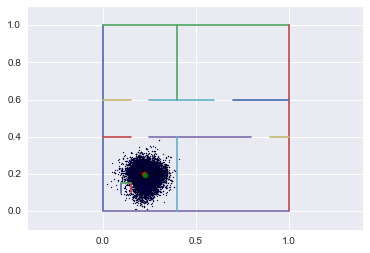

142


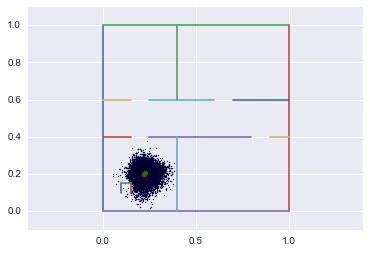

143


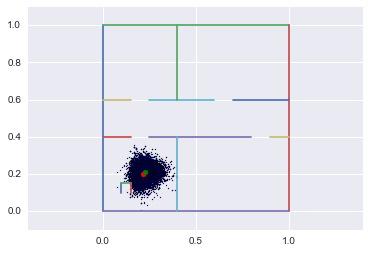

144


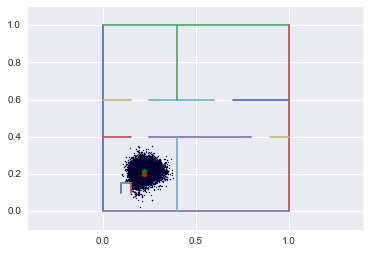

145


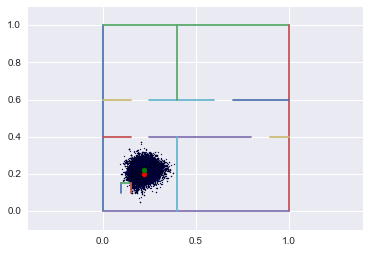

146


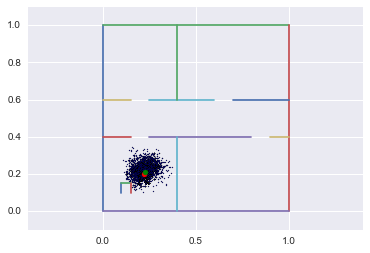

147


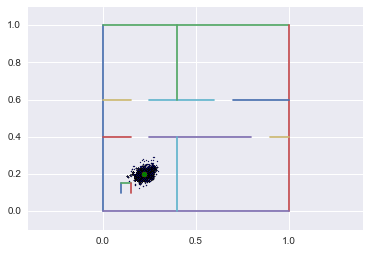

148


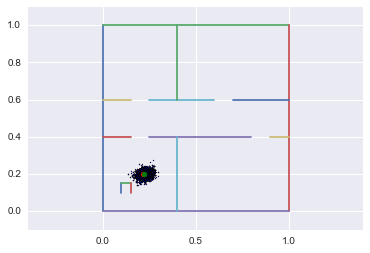

149


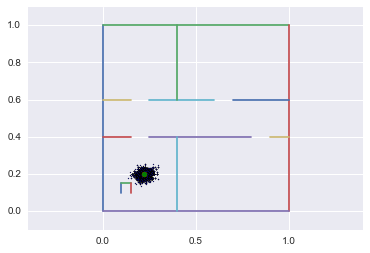

150


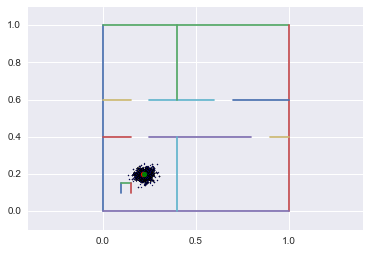

151


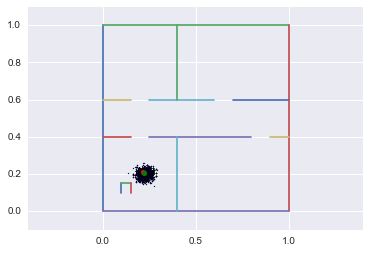

152


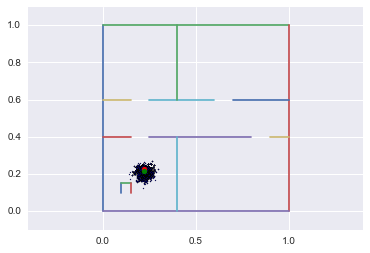

153


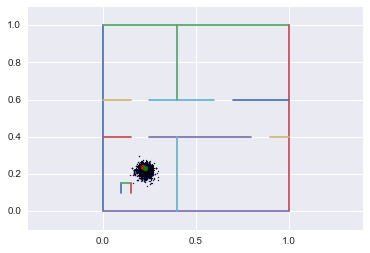

154


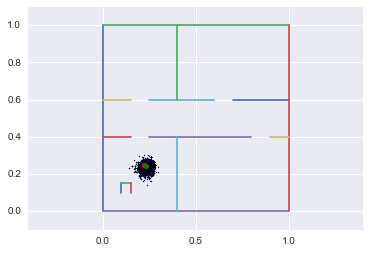

155


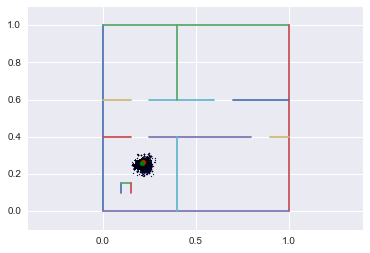

156


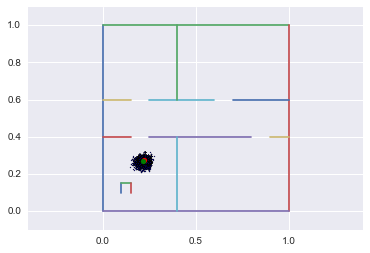

157


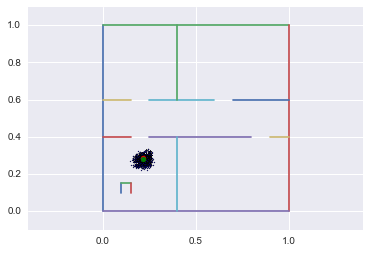

158


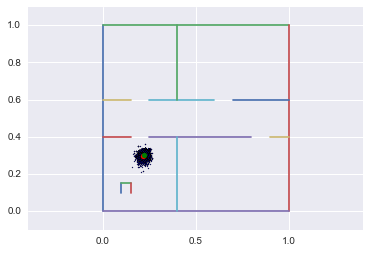

159


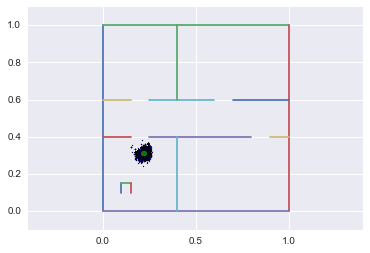

160


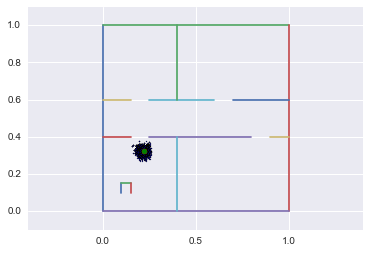

161


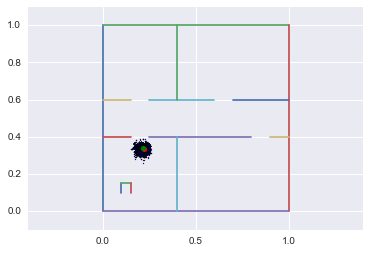

162


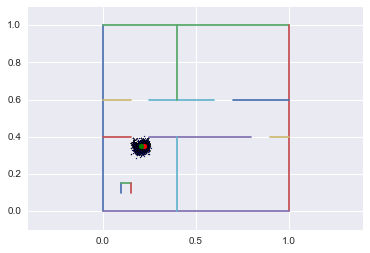

163


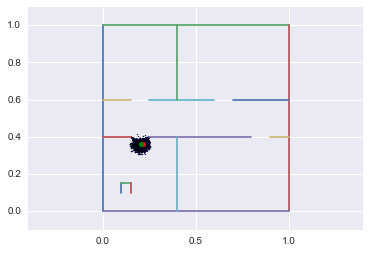

164


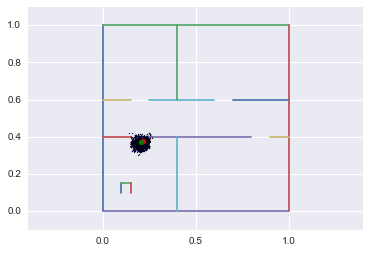

165


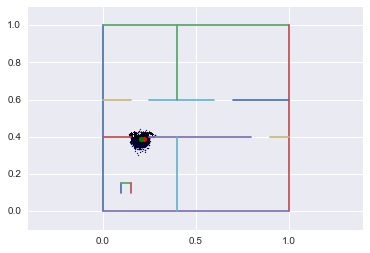

166


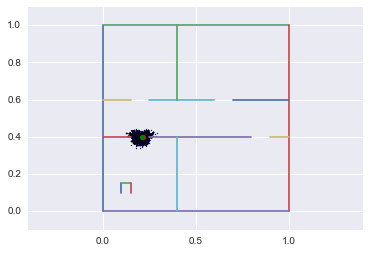

167


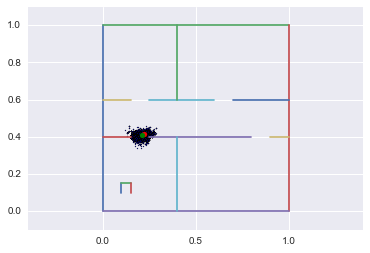

168


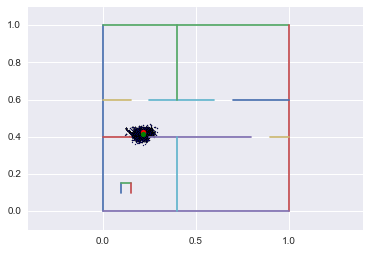

169


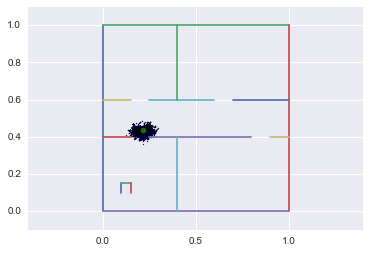

170


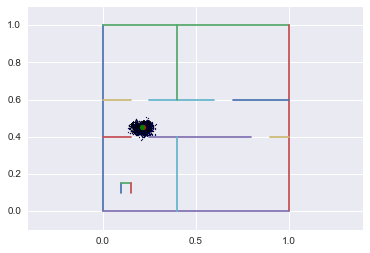

171


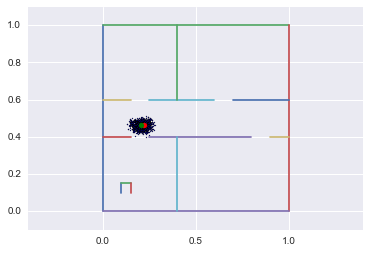

172


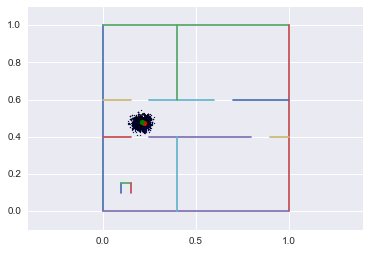

173


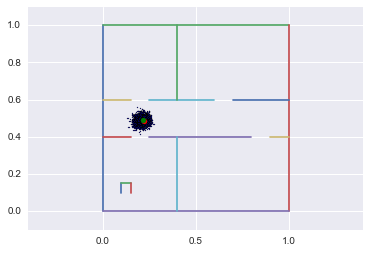

174


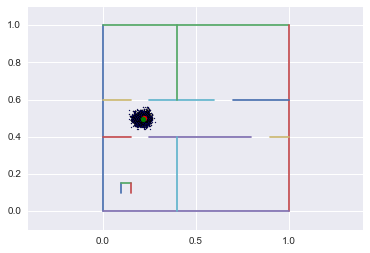

175


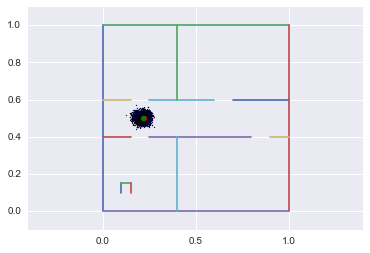

176


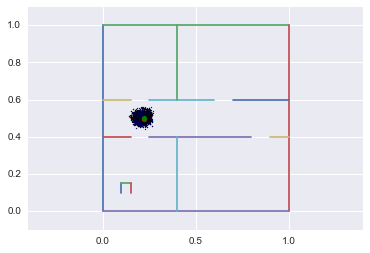

177


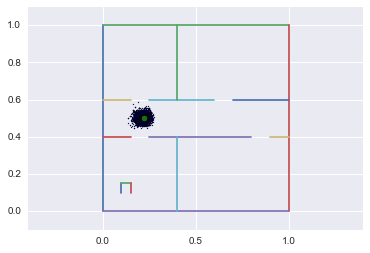

178


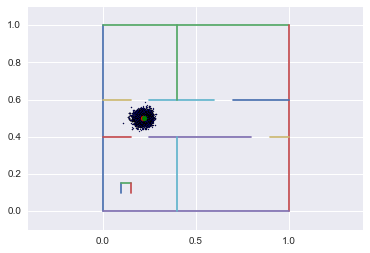

179


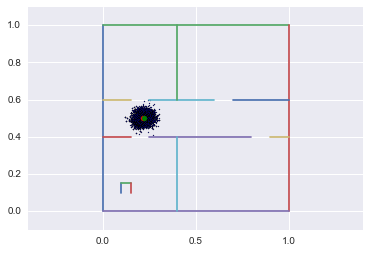

180


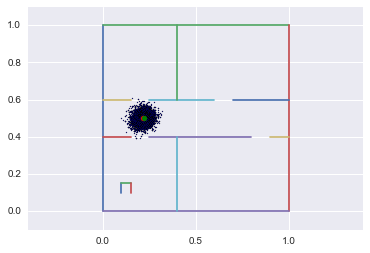

181


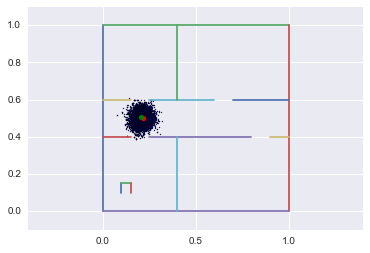

182


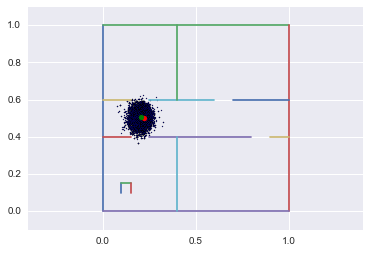

183


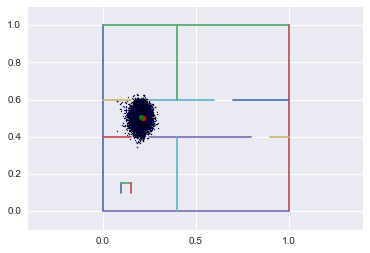

184


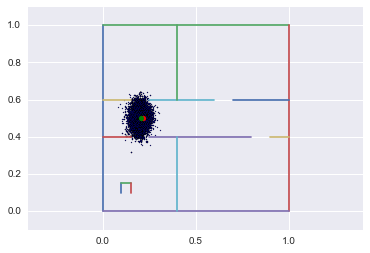

185


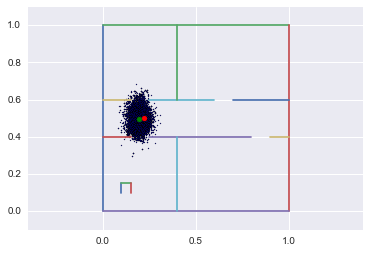

186


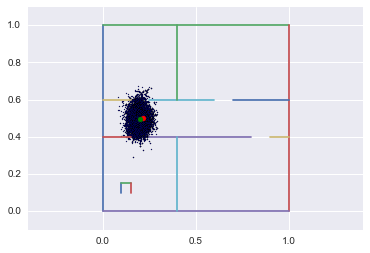

187


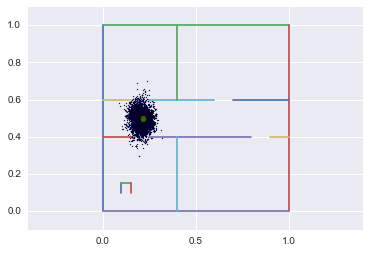

188


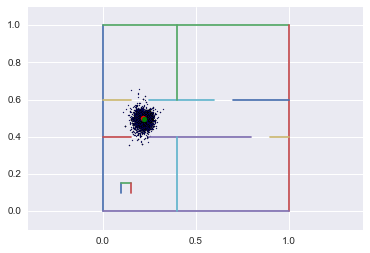

189


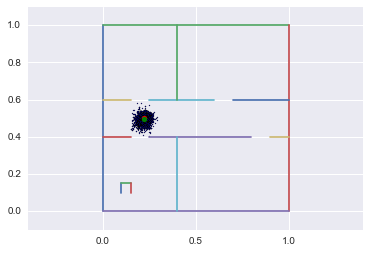

190


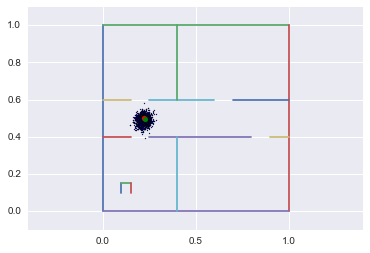

191


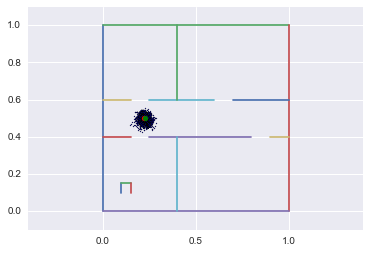

192


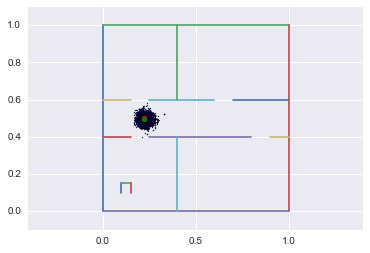

193


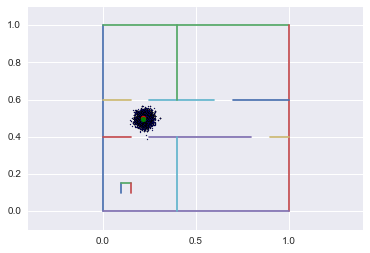

194


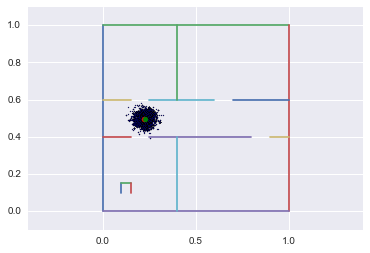

195


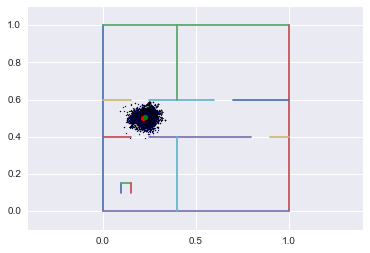

196


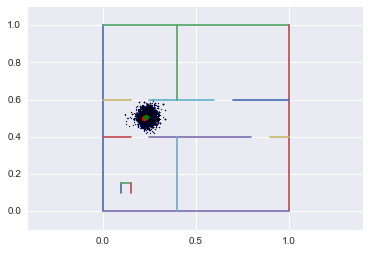

197


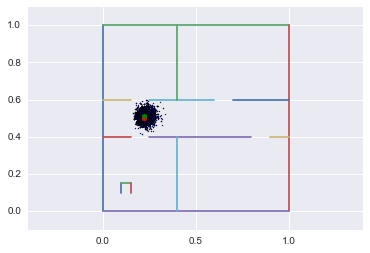

198


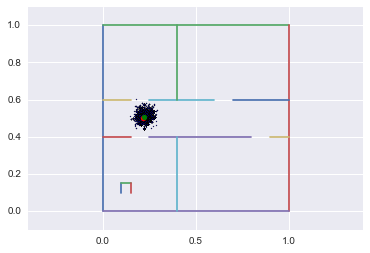

199


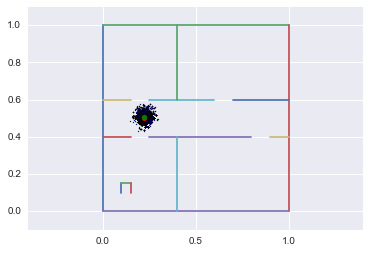

200


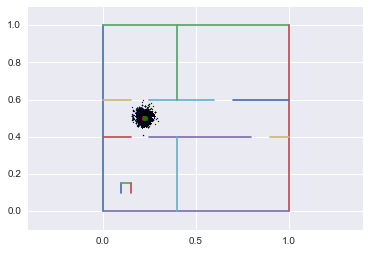

201


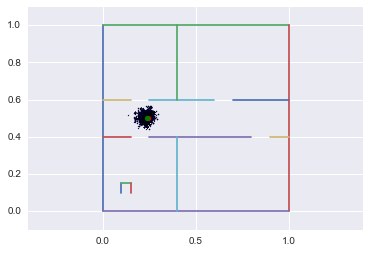

202


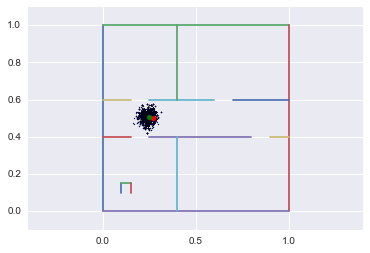

203


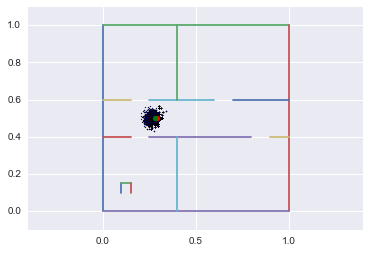

204


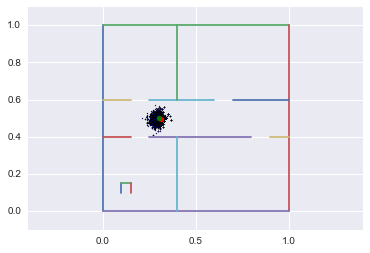

205


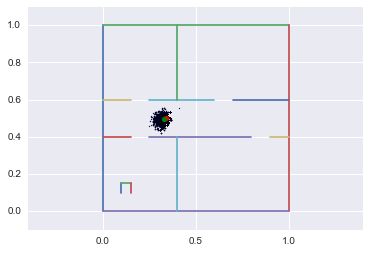

206


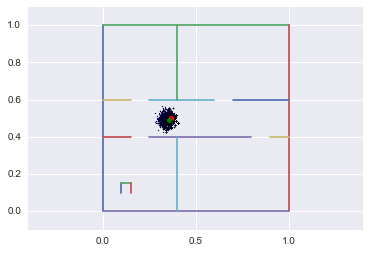

207


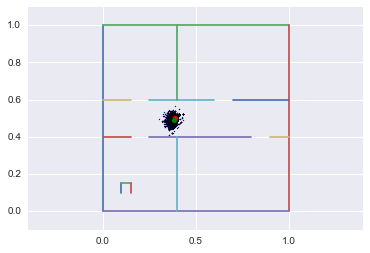

208


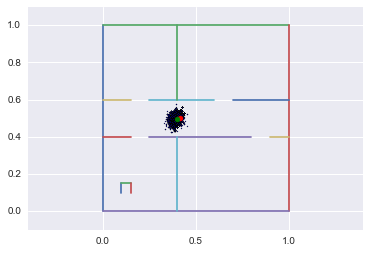

209


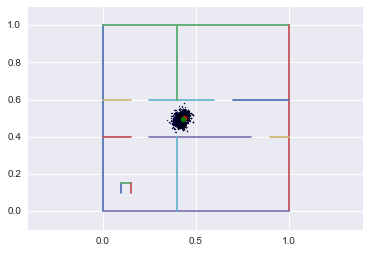

210


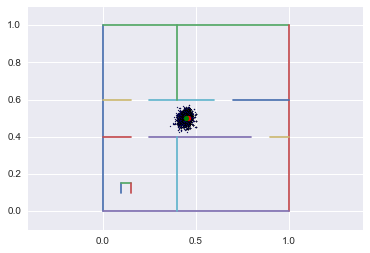

211


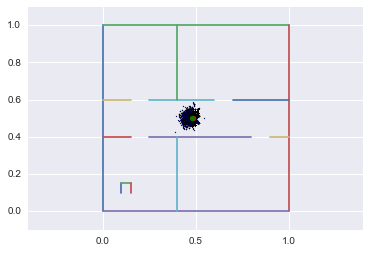

212


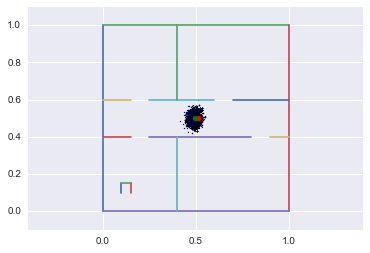

213


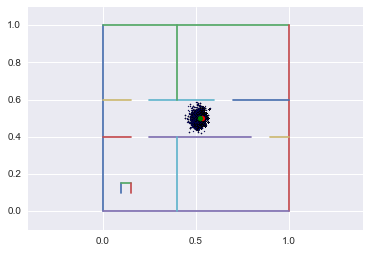

214


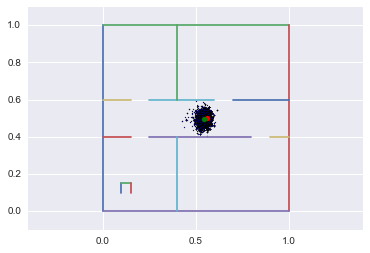

215


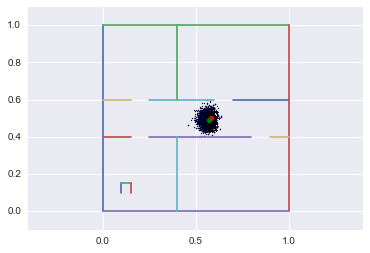

216


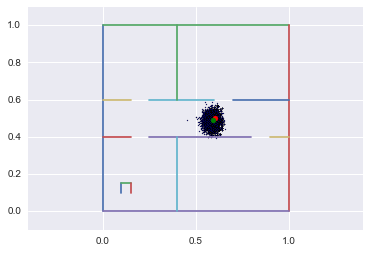

217


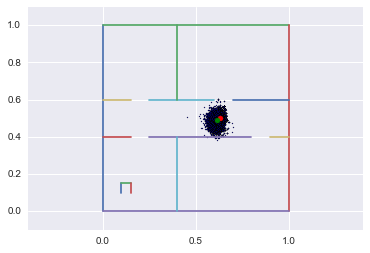

218


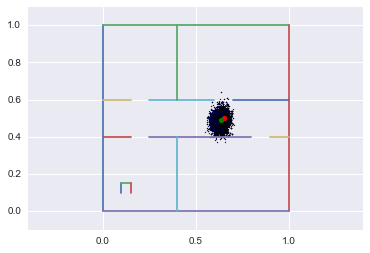

219


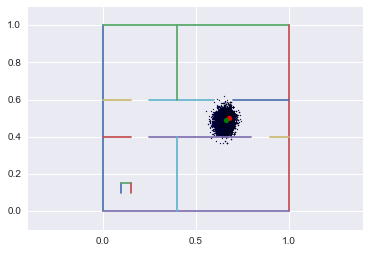

220


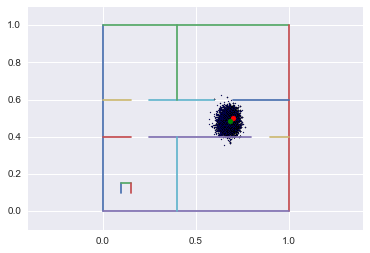

221


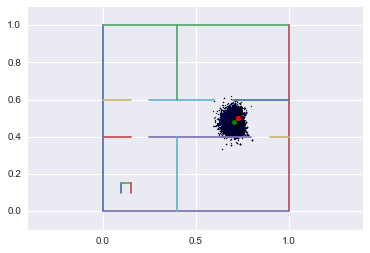

222


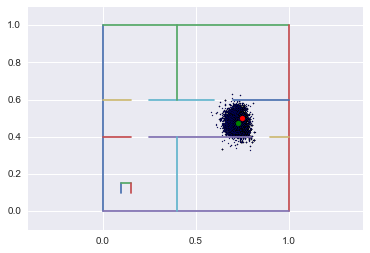

223


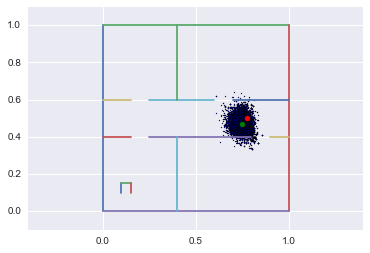

224


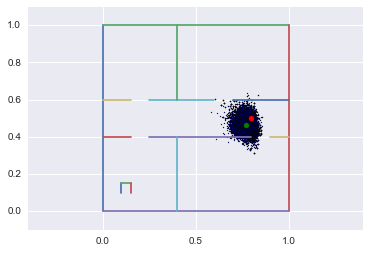

In [74]:
# start with initial points    
particles = initial
weights = np.ones((particle_count, 1)) / particle_count
estimated_position = []
for i, (sonar, state) in enumerate(zip(sonars.T, true_states.T)):
    print i
    particles = jitterPoints(particles) # sample from proposal distribution
    weights = updateWeights(weights, particles, sonar, calcLaplacianLikelihood)
    particles = resampleParticles(weights, particles) # resample
    estimated_position.append([np.mean(particles[:, 0]), np.mean(particles[:, 1])])
    show_map(room_map)
    plt.scatter(particles[:, 0], particles[:, 1], s=1)
    plt.scatter(state[0], state[1], color='red', s=25)
    plt.scatter(np.mean(particles[:, 0]), np.mean(particles[:, 1]), color='green', s=25)
    plt.show()
    

In [75]:
estimated_position = np.array(estimated_position)

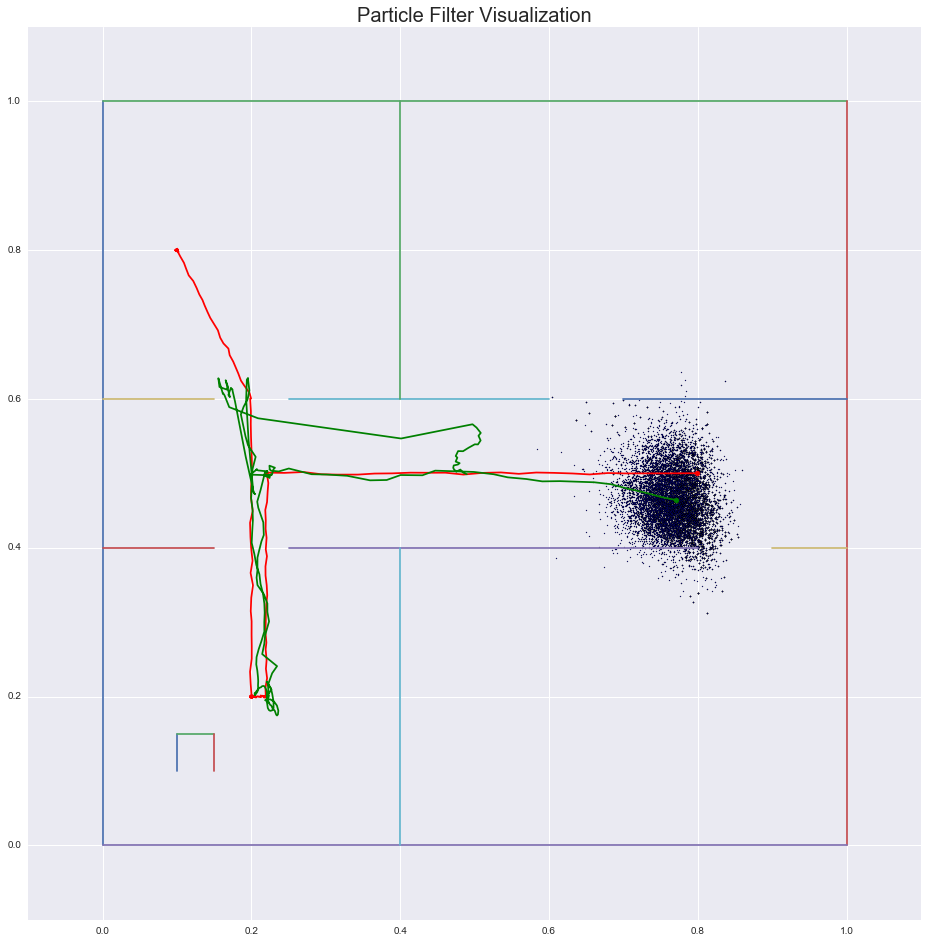

In [82]:
show_map(room_map)
plt.scatter(particles[:, 0], particles[:, 1], s=1)
plt.scatter(state[0], state[1], color='red', s=25)
plt.plot(true_states.T[:, 0], true_states.T[:, 1], color='red')
plt.scatter(np.mean(particles[:, 0]), np.mean(particles[:, 1]), color='green', s=25)
plt.plot(estimated_position[:, 0], estimated_position[:, 1], color='green')
plt.title("Particle Filter Visualization", fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16, 16)
plt.show()